In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train_path = '/content/drive/My Drive/Img'

In [2]:
#first we import needed libiraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd 
import numpy as np
import os 
import glob2 as gb
import cv2
import scipy.optimize as opt
import sys
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns
%matplotlib inline
np.random.seed(2)
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

#code characters    
code = {'0':0, '1':1, '2':2, '3':3, '4':4,
               '5':5, '6':6, '7':7, '8':8, '9':9,
               'A':10, 'B':11, 'C':12, 'D':13, 'E':14, 'F':15, 'G':16,
               'H':17, 'I':18, 'J':19, 'K':20, 'L':21, 'M':22, 'N':23,
               'O':24, 'P':25, 'Q':26, 'R':27, 'S':28, 'T':29, 'U':30,
               'V':31, 'W':32, 'X':33, 'Y':34, 'Z':35, 'As':36, 'Bs':37, 
               'Cs':38, 'Ds':39, 'Es':40, 'Fs':41, 'Gs':42, 'Hs':43, 'Is':44, 
               'Js':45, 'Ks':46, 'Ls':47, 'Ms':48, 'Ns':49, 'Os':50, 'Ps':51,
               'Qs':52, 'Rs':53, 'Ss':54, 'Ts':55, 'Us':56, 'Vs':57, 'Ws':58, 
               'Xs':59, 'Ys':60, 'Zs':61,}

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [3]:
#read dataset from specific file in your device
train_path = '/content/drive/My Drive/Img/'
dataset_path = train_path




#create X and Y
x=[]
y=[]

#upload data and resize it
for folder in os.listdir(dataset_path):
    files = gb.glob(pathname=str(dataset_path)+folder+'/*png')
    print(f'for dataset , found {len(files)} in folder {folder}')
    for file in files :
        image = cv2.imread(file)
        image_array = cv2.resize(image,(224,224))
        x.append(list(image_array))
        y.append(code[folder])

for dataset , found 55 in folder 1
for dataset , found 55 in folder 2
for dataset , found 55 in folder 9
for dataset , found 55 in folder 7
for dataset , found 55 in folder 8
for dataset , found 55 in folder 3
for dataset , found 55 in folder 6
for dataset , found 55 in folder 4
for dataset , found 55 in folder 5
for dataset , found 55 in folder 0
for dataset , found 55 in folder A
for dataset , found 55 in folder Es
for dataset , found 55 in folder As
for dataset , found 55 in folder Cs
for dataset , found 55 in folder Bs
for dataset , found 55 in folder E
for dataset , found 55 in folder C
for dataset , found 55 in folder B
for dataset , found 55 in folder D
for dataset , found 55 in folder Ds
for dataset , found 55 in folder H
for dataset , found 55 in folder F
for dataset , found 55 in folder Hs
for dataset , found 55 in folder G
for dataset , found 55 in folder I
for dataset , found 55 in folder Js
for dataset , found 55 in folder Gs
for dataset , found 55 in folder Is
for dataset

2


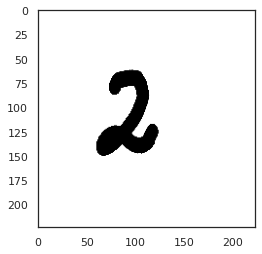

In [6]:
plt.imshow (x [55])
print (y [55])

(224, 224, 3)
sample x_train[0] : 
  [[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


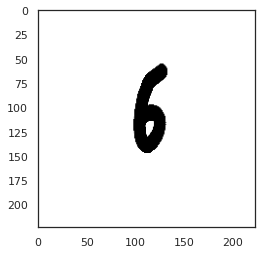

In [7]:
# Split the train and the validation set for the fitting
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size = 0.1,random_state = 2 )

x_train = np.asarray(x_train)
x_test  = np.asarray(x_test)
y_train = np.asarray(y_train)
y_test  = np.asarray(y_test)



plt.imshow(x_train[1])
print(x_train[0].shape)
# print('shape of x_train :', x_train.shape())
#print('shape of x_train[5] : ', x_train[5].shape)
#print('any image contain : x_train[0] \n',x_train[0])
#print('x_train shape :' , x_train.shape)
#print('y_train shape :' , y_train.shape)

#print(type(y_train))

# next step should be normlize image 
x_train , x_test = x_train/255.0 , x_test/255.0
print('sample x_train[0] : \n ' ,x_train[0])

In [8]:
# in the same step convert ouput by using one hot encoding 
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
# function get code
def getcode(n):
    for x,y in code.items():
        if n ==y :
            return x

In [0]:
from tensorflow.keras.models import Sequential
import numpy as np 
from tensorflow.keras.applications import vgg16 , inception_v3 , resnet50 , mobilenet

In [0]:

vgg_model = vgg16.VGG16(weights='imagenet')

#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')

#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')

#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet')

In [0]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from keras.applications.imagenet_utils import decode_predictions

In [0]:
image_batch = np.expand_dims(x_train[0], axis=0)

In [14]:
print('image batch size', image_batch.shape)

image batch size (1, 224, 224, 3)


In [15]:
#preprocess for vgg16
processed_image_vgg16 = vgg16.preprocess_input(image_batch.copy())

#preprocess for resnet50
processed_image_resnet50 = resnet50.preprocess_input(image_batch.copy())

#preprocess for mobilenet
processed_image_mobilenet = mobilenet.preprocess_input(image_batch.copy())

# Predict the Image label
# vgg16
predictions_vgg16 = vgg_model.predict(processed_image_vgg16)
label_vgg16 = decode_predictions(predictions_vgg16 , top=3)
print ('label_vgg16 = ', label_vgg16)

# resnet50
predictions_resnet50 = resnet_model.predict(processed_image_resnet50)
label_resnet50 = decode_predictions(predictions_resnet50 , top=3 )
print ('label_resnet50 = ', label_resnet50)

# mobilenet
predictions_mobilenet = mobilenet_model.predict(processed_image_mobilenet)
label_mobilenet = decode_predictions(predictions_mobilenet , top = 3)
print ('label_mobilenet = ', label_mobilenet)

print(label_vgg16[0][0][1])
print('The heighst prediction is : %s(%.2f%%)' % (label_vgg16[0][0][1] , label_vgg16[0][0][2]*100 ) )





label_vgg16 =  [[('n03729826', 'matchstick', 0.08734357), ('n01930112', 'nematode', 0.05465962), ('n04286575', 'spotlight', 0.030802974)]]
label_resnet50 =  [[('n03729826', 'matchstick', 0.0766837), ('n03196217', 'digital_clock', 0.076420695), ('n04286575', 'spotlight', 0.06996454)]]
label_mobilenet =  [[('n01930112', 'nematode', 0.05042505), ('n04286575', 'spotlight', 0.04840996), ('n03729826', 'matchstick', 0.043757763)]]
matchstick
The heighst prediction is : matchstick(8.73%)


In [16]:
from tensorflow.keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet', include_top=False)
features = model.predict(processed_image_vgg16) 
print(features.shape)

(1, 7, 7, 512)


In [17]:

VGG = VGG16(include_top=False , input_shape = (224 ,224,3))
for layer in VGG.layers[:10]:  # to freeze all layer, remove the slicing [:10] 
  layer.trainable = False 

# Lets print the VGG layers
for layer in VGG.layers: 
  print(layer.name , layer.trainable)

input_6 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool True
block4_conv1 True
block4_conv2 True
block4_conv3 True
block4_pool True
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [18]:
import keras
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# create the base pre-trained model ( Remove the default classifier from the model architecture )
base_model = InceptionV3(weights='imagenet', include_top=False)

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
#for i, layer in enumerate(base_model.layers):
   #print(i, layer.name)


# lets add our own classifier
# add a global spatial average pooling layer
x = base_model.output
print(x.shape)
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(200, activation='softmax')(x)

# this is the model we will train 
model = Model(inputs=base_model.input, outputs=predictions)

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(model.layers):
   print(i, layer.name)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False


# compile the model (should be done after setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

# train the model on the new data for a few epochs
model.fit(...)

# Till now, only the top layers ( classifier ) are well trained 

# Lets start fine-tuning convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
model.fit(...)


(None, None, None, 2048)
0 input_7
1 conv2d_94
2 batch_normalization_94
3 activation_94
4 conv2d_95
5 batch_normalization_95
6 activation_95
7 conv2d_96
8 batch_normalization_96
9 activation_96
10 max_pooling2d_4
11 conv2d_97
12 batch_normalization_97
13 activation_97
14 conv2d_98
15 batch_normalization_98
16 activation_98
17 max_pooling2d_5
18 conv2d_102
19 batch_normalization_102
20 activation_102
21 conv2d_100
22 conv2d_103
23 batch_normalization_100
24 batch_normalization_103
25 activation_100
26 activation_103
27 average_pooling2d_9
28 conv2d_99
29 conv2d_101
30 conv2d_104
31 conv2d_105
32 batch_normalization_99
33 batch_normalization_101
34 batch_normalization_104
35 batch_normalization_105
36 activation_99
37 activation_101
38 activation_104
39 activation_105
40 mixed0
41 conv2d_109
42 batch_normalization_109
43 activation_109
44 conv2d_107
45 conv2d_110
46 batch_normalization_107
47 batch_normalization_110
48 activation_107
49 activation_110
50 average_pooling2d_10
51 conv2d_10

ValueError: ignored

In [19]:

from keras.applications.vgg16 import VGG16
from keras.layers import Conv2D, MaxPooling2D

model = keras.models.Sequential()
model.add(Conv2D(64, kernel_size = 3 , input_shape =(224,224,3)))
model.add(VGG16().layers[2])  # adding 3rd layer of pretrained model
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        multiple                  36928     
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


In [31]:
x_testing =np.expand_dims(x_test,axis=1)

print(x_testing.shape)

(341, 1, 224, 224, 3)


In [0]:

prediction =model.predict(x_testing[50])

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 

In [57]:
results=confusion_matrix(y_test[100],prediction)
 

ValueError: ignored

In [55]:
import seaborn as sns
sns.set()
print ('Confusion Matrix :')
print(results)
sns.heatmap(results,center=True)
plt.show() 
print ('Accuracy Score :',accuracy_score(y_test, y_pred.round(), normalize=False))
print ('Report : ')
print (classification_report(y_test, y_pred))

Confusion Matrix :


NameError: ignored